In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Include the '.csv' file extension in the file path
df = pd.read_csv('clean_sp500_stock_2018_2023.csv')

In [192]:
df.head()

,Company,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Security,GICS Sector,GICS Sub-Industry,Founded,mo_return,perform_vs_sp,perform_flag,time_higher_sp
0,MMM,196.584341,216.586277,194.108068,208.857315,49095800.0,0.00,0.0,2018,1,1,3M,Industrials,Industrial Conglomerates,1902,NaN,NaN,0,0.333333
1,MMM,206.305991,208.515454,181.910116,196.359207,58411400.0,1.36,0.0,2018,2,1,3M,Industrials,Industrial Conglomerates,1902,-0.059840,-0.020893,0,0.333333
2,MMM,198.053837,203.882660,180.089353,184.106628,55656900.0,0.00,0.0,2018,3,1,3M,Industrials,Industrial Conglomerates,1902,-0.062399,-0.035514,0,0.333333
3,MMM,182.873784,185.926572,162.854527,163.030655,67396900.0,0.00,0.0,2018,4,1,3M,Industrials,Industrial Conglomerates,1902,-0.114477,-0.117196,0,0.333333
4,MMM,162.728708,172.801227,160.556535,165.412476,64993100.0,1.36,0.0,2018,5,1,3M,Industrials,Industrial Conglomerates,1902,0.014610,-0.006999,0,0.333333


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32282 entries, 0 to 32281
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            32282 non-null  object 
 1   Open               32282 non-null  float64
 2   High               32282 non-null  float64
 3   Low                32282 non-null  float64
 4   Close              32282 non-null  float64
 5   Volume             32282 non-null  float64
 6   Dividends          32282 non-null  float64
 7   Stock Splits       32282 non-null  float64
 8   Year               32282 non-null  int64  
 9   Month              32282 non-null  int64  
 10  Day                32282 non-null  int64  
 11  Security           32282 non-null  object 
 12  GICS Sector        32282 non-null  object 
 13  GICS Sub-Industry  32282 non-null  object 
 14  Founded            32282 non-null  object 
 15  mo_return          31781 non-null  float64
 16  perform_vs_sp      317

In [194]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
any_nulls = df.isnull().values.any()

null_values, any_nulls

(Company                0
 Open                   0
 High                   0
 Low                    0
 Close                  0
 Volume                 0
 Dividends              0
 Stock Splits           0
 Year                   0
 Month                  0
 Day                    0
 Security               0
 GICS Sector            0
 GICS Sub-Industry      0
 Founded                0
 mo_return            501
 perform_vs_sp        501
 perform_flag           0
 time_higher_sp         0
 dtype: int64,
 True)

In [195]:
# Sort the data by Company and then by Year, Month, and Day
df_sorted = df.sort_values(by=['Company', 'Year', 'Month', 'Day'])

# Perform interpolation per company for 'mo_return' and 'perform_vs_sp' columns
df_interpolated = df_sorted.groupby('Company').apply(lambda group: group.interpolate(method='linear'))

# Apply forward fill to address the initial missing values within each company's data
df_ffilled = df_interpolated.groupby('Company').apply(lambda group: group.ffill().bfill())

# Check for null values after interpolation and forward fill
null_values_after = df_ffilled.isnull().sum()

# Results
null_values_after


C:\Users\faisa\AppData\Local\Temp\ipykernel_9112\4137139973.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_interpolated = df_sorted.groupby('Company').apply(lambda group: group.interpolate(method='linear'))
C:\Users\faisa\AppData\Local\Temp\ipykernel_9112\4137139973.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .g

Company              0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Dividends            0
Stock Splits         0
Year                 0
Month                0
Day                  0
Security             0
GICS Sector          0
GICS Sub-Industry    0
Founded              0
mo_return            0
perform_vs_sp        0
perform_flag         0
time_higher_sp       0
dtype: int64

In [196]:
# Filter the dataset for the year 2022
df_2022 = df_ffilled[df_ffilled['Year'] == 2022]

# Group by 'GICS Sector' and sum the volumes for the 'Volume Traded' chart
volume_by_sector_2022 = df_2022.groupby('GICS Sector')['Volume'].sum().reset_index()

# Group by 'GICS Sector' and count the number of unique companies for the 'Number of Companies' chart
companies_by_sector_2022 = df_2022.groupby('GICS Sector')['Company'].nunique().reset_index()

# Renaming the columns for easier plotting
volume_by_sector_2022.rename(columns={'Volume': '2022'}, inplace=True)
companies_by_sector_2022.rename(columns={'Company': '2022'}, inplace=True)

volume_by_sector_2022, companies_by_sector_2022

(               GICS Sector          2022
 0   Communication Services  7.414041e+10
 1   Consumer Discretionary  1.134374e+11
 2         Consumer Staples  3.706761e+10
 3                   Energy  5.470087e+10
 4               Financials  7.943684e+10
 5              Health Care  4.685407e+10
 6              Industrials  5.332328e+10
 7   Information Technology  1.294178e+11
 8                Materials  2.236133e+10
 9              Real Estate  1.804034e+10
 10               Utilities  2.681589e+10,
                GICS Sector  2022
 0   Communication Services    24
 1   Consumer Discretionary    53
 2         Consumer Staples    36
 3                   Energy    23
 4               Financials    71
 5              Health Care    64
 6              Industrials    74
 7   Information Technology    66
 8                Materials    29
 9              Real Estate    30
 10               Utilities    30)

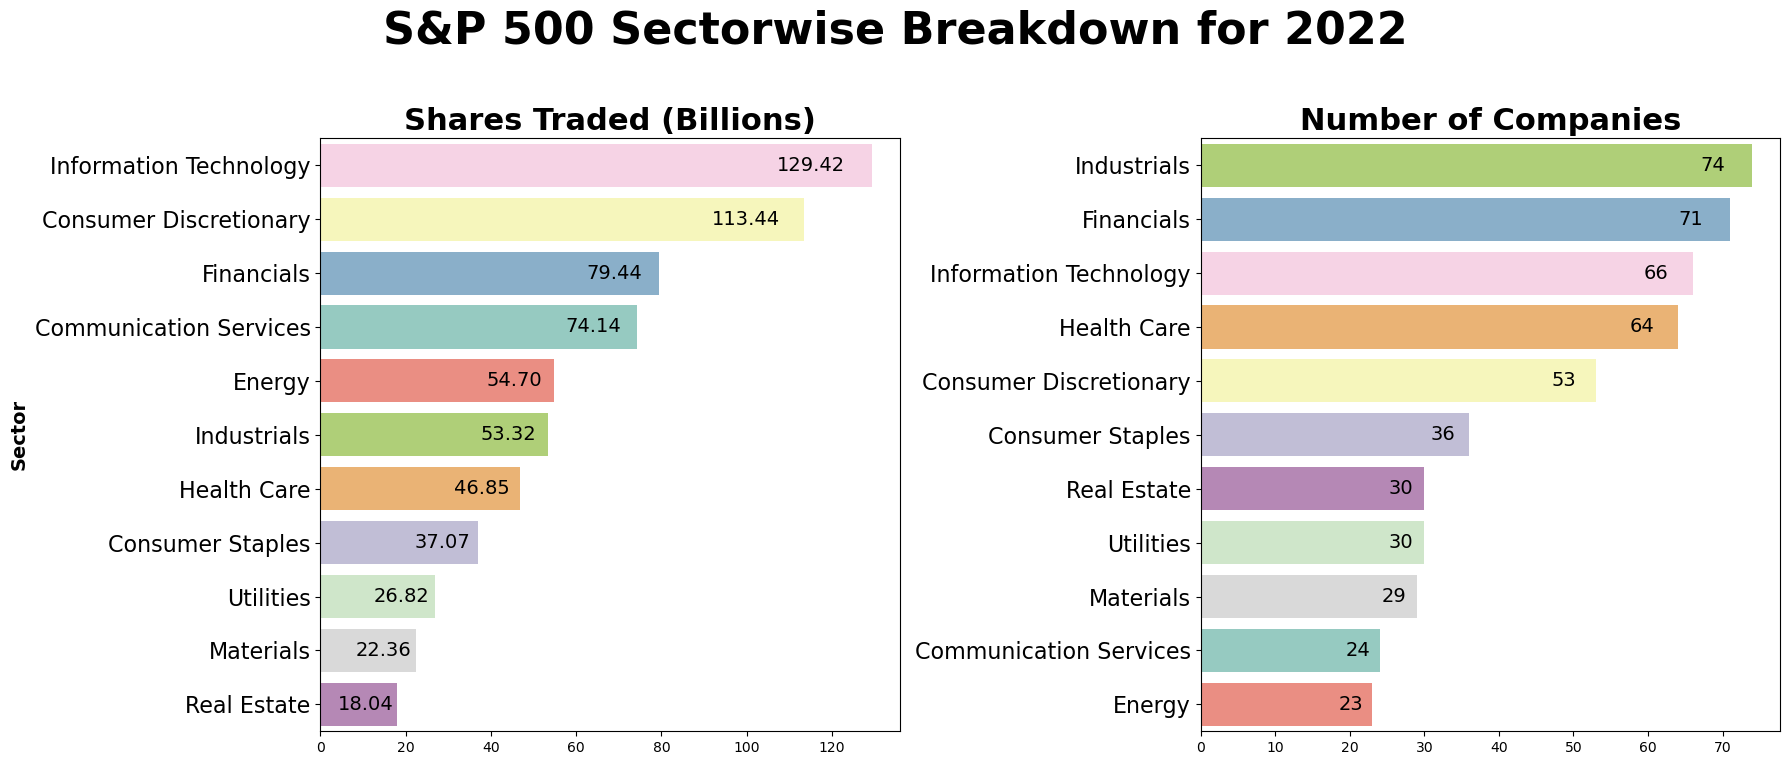

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Volume Traded' from the first DataFrame into billions for easier readability
volume_by_sector_2022['2022'] = volume_by_sector_2022['2022'] / 1e9

# Choose the 'Set3' color palette, which provides distinct colors
palette = sns.color_palette('Set3', n_colors=len(volume_by_sector_2022['GICS Sector']))

# Update the sector_color_map with the new 'Set3' palette
sector_color_map = {sector: color for sector, color in zip(volume_by_sector_2022['GICS Sector'].sort_values(), palette)}

# Plot the charts again with the 'Set3' color palette
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('S&P 500 Sectorwise Breakdown for 2022', weight='bold', fontsize=32)

# Volume Traded chart
sns.barplot(
    y='GICS Sector',
    x='2022',
    data=volume_by_sector_2022.sort_values('2022', ascending=False),
    palette=sector_color_map,
    ax=axes[0]
)
axes[0].set_title('Shares Traded (Billions)', weight='bold', fontsize=22)
axes[0].set_xlabel('')
axes[0].set_ylabel('Sector', weight='bold', fontsize=14)
axes[0].tick_params(axis='y', labelsize=16)
for bar in axes[0].patches:
    axes[0].text(
        bar.get_width() - bar.get_width() * 0.05,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}',
        va='center', ha='right', fontsize=14, color='black'
    )

# Number of Companies chart
sns.barplot(
    y='GICS Sector',
    x='2022',
    data=companies_by_sector_2022.sort_values('2022', ascending=False),
    palette=sector_color_map,
    ax=axes[1]
)
axes[1].set_title('Number of Companies', weight='bold', fontsize=22)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=16)
for bar in axes[1].patches:
    axes[1].text(
        bar.get_width() - bar.get_width() * 0.05,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center', ha='right', fontsize=14, color='black'
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

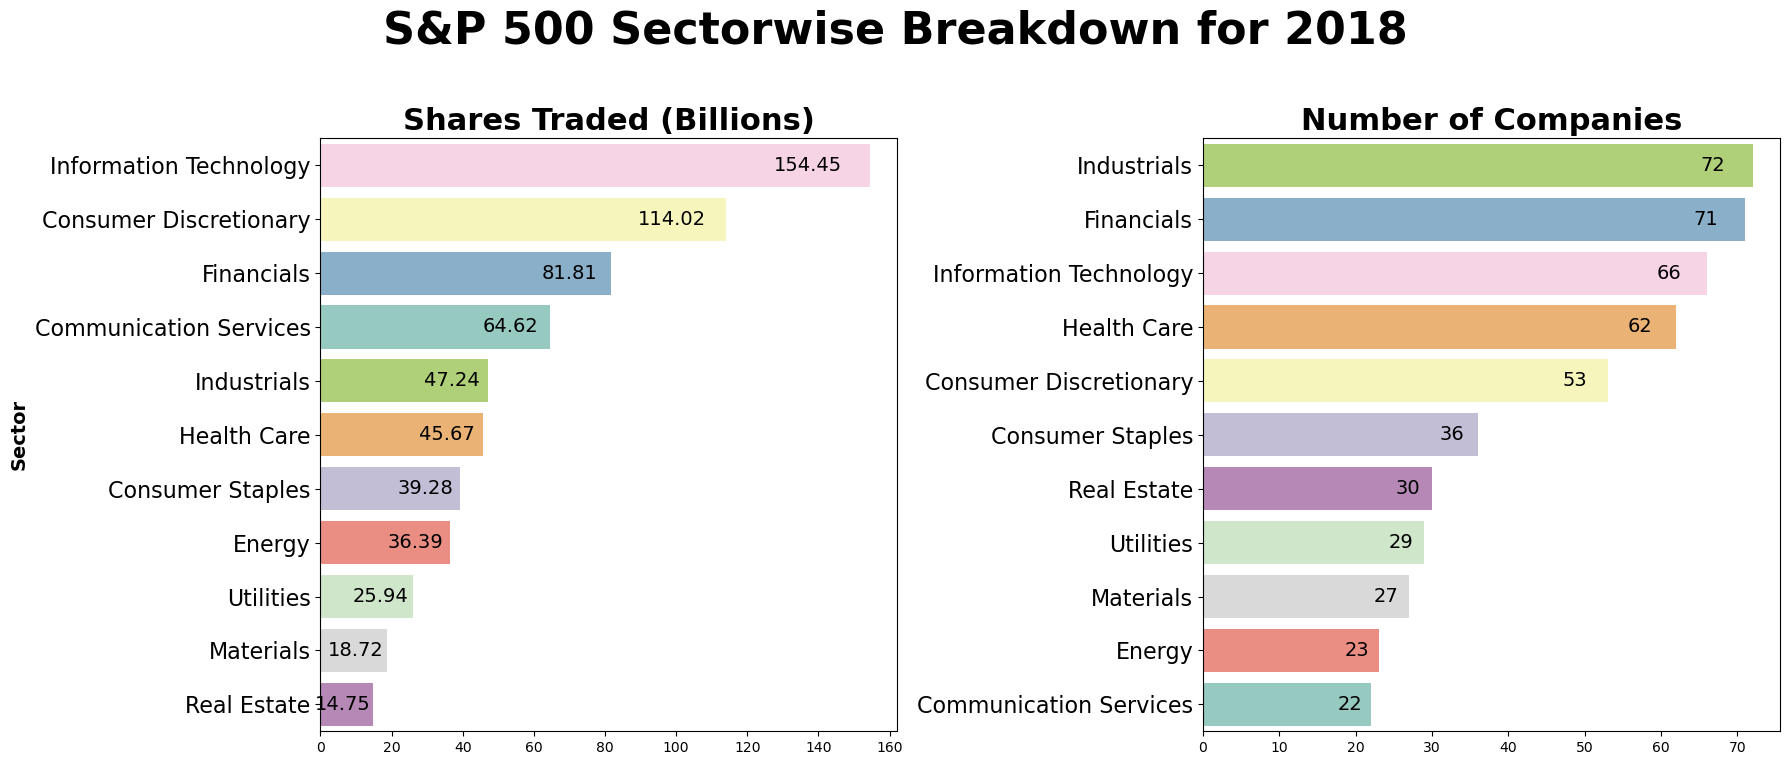

In [198]:
# Filter the dataset for the year 2018
df_2018 = df_ffilled[df_ffilled['Year'] == 2018]

# Group by 'GICS Sector' and sum the volumes for the 'Volume Traded' chart
volume_by_sector_2018 = df_2018.groupby('GICS Sector')['Volume'].sum().reset_index()
# Group by 'GICS Sector' and count the number of unique companies for the 'Number of Companies' chart
companies_by_sector_2018 = df_2018.groupby('GICS Sector')['Company'].nunique().reset_index()

# Convert 'Volume Traded' into billions for easier readability and rename columns for plotting
volume_by_sector_2018['Volume Traded'] = volume_by_sector_2018['Volume'] / 1e9
volume_by_sector_2018.drop('Volume', axis=1, inplace=True)  # Drop the original 'Volume' column to avoid confusion
companies_by_sector_2018.rename(columns={'Company': 'Number of Companies'}, inplace=True)

# Choose the 'Set3' color palette, which provides distinct colors
palette = sns.color_palette('Set3', n_colors=len(volume_by_sector_2018['GICS Sector']))

# Update the sector_color_map with the new 'Set3' palette
sector_color_map = {sector: color for sector, color in zip(volume_by_sector_2018['GICS Sector'].sort_values(), palette)}

# Plot the charts again with the 'Set3' color palette for the year 2018
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('S&P 500 Sectorwise Breakdown for 2018', weight='bold', fontsize=32)

# Volume Traded chart for 2018
sns.barplot(
    y='GICS Sector',
    x='Volume Traded',
    data=volume_by_sector_2018.sort_values('Volume Traded', ascending=False),
    palette=sector_color_map,
    ax=axes[0]
)
axes[0].set_title('Shares Traded (Billions)', weight='bold', fontsize=22)
axes[0].set_xlabel('')
axes[0].set_ylabel('Sector', weight='bold', fontsize=14)
axes[0].tick_params(axis='y', labelsize=16)
for bar in axes[0].patches:
    axes[0].text(
        bar.get_width() - bar.get_width() * 0.05,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}',
        va='center', ha='right', fontsize=14, color='black'
    )

# Number of Companies chart for 2018
sns.barplot(
    y='GICS Sector',
    x='Number of Companies',
    data=companies_by_sector_2018.sort_values('Number of Companies', ascending=False),
    palette=sector_color_map,
    ax=axes[1]
)
axes[1].set_title('Number of Companies', weight='bold', fontsize=22)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=16)
for bar in axes[1].patches:
    axes[1].text(
        bar.get_width() - bar.get_width() * 0.05,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center', ha='right', fontsize=14, color='black'
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [199]:
sector_profitability_2022 = df_2022.groupby('GICS Sector')['mo_return'].mean().reset_index()
companies_by_sector_2022 = df_2022.groupby('GICS Sector')['Company'].nunique().reset_index()
volume_by_sector_2022 = df_2022.groupby('GICS Sector')['Volume'].sum().reset_index()

# Convert 'Volume Traded' from the original DataFrame into billions for easier readability
volume_by_sector_2022['Volume'] = volume_by_sector_2022['Volume'] / 1e9

# Merge the profitability, number of companies, and volume traded data into one table
sector_data_2022 = sector_profitability_2022.merge(companies_by_sector_2022, on='GICS Sector')
sector_data_2022 = sector_data_2022.merge(volume_by_sector_2022, on='GICS Sector')

# Rename columns for the final table
sector_data_2022.columns = ['GICS Sector', 'Profitability', 'Number of Companies', 'Shares Traded (Billions)']

# Display the final table
sector_data_table = sector_data_2022.copy()
sector_data_table

,GICS Sector,Profitability,Number of Companies,Shares Traded (Billions)
0,Communication Services,-0.025664,24,74.140409
1,Consumer Discretionary,-0.018525,53,113.437448
2,Consumer Staples,0.003509,36,37.067610
3,Energy,0.047889,23,54.700868
4,Financials,-0.005435,71,79.436842
5,Health Care,-0.006094,64,46.854070
6,Industrials,-0.004579,74,53.323275
7,Information Technology,-0.017748,66,129.417779
8,Materials,-0.004098,29,22.361327
9,Real Estate,-0.020098,30,18.040345


In [200]:
# Convert 'Profitability' to percentage
sector_data_2022['Profitability'] = (sector_data_2022['Profitability'] * 100).round(2)

# Sort the table by 'Profitability' in descending order
sector_data_2022_sorted = sector_data_2022.sort_values(by='Profitability', ascending=False)

# Rename 'Volume' column to 'Shares Traded (Billions)' to match the user's table
sector_data_2022_sorted.rename(columns={'Volume Traded (Billions)': 'Shares Traded (Billions)', 'Profitability': 'Profitability (%)'}, inplace=True)

# Display the sorted table with profitability in percentages
print(sector_data_2022_sorted.to_string(index=False))


           GICS Sector  Profitability (%)  Number of Companies  Shares Traded (Billions)
                Energy               4.79                   23                 54.700868
             Utilities               0.70                   30                 26.815890
      Consumer Staples               0.35                   36                 37.067610
             Materials              -0.41                   29                 22.361327
           Industrials              -0.46                   74                 53.323275
            Financials              -0.54                   71                 79.436842
           Health Care              -0.61                   64                 46.854070
Information Technology              -1.77                   66                129.417779
Consumer Discretionary              -1.85                   53                113.437448
           Real Estate              -2.01                   30                 18.040345
Communication Service

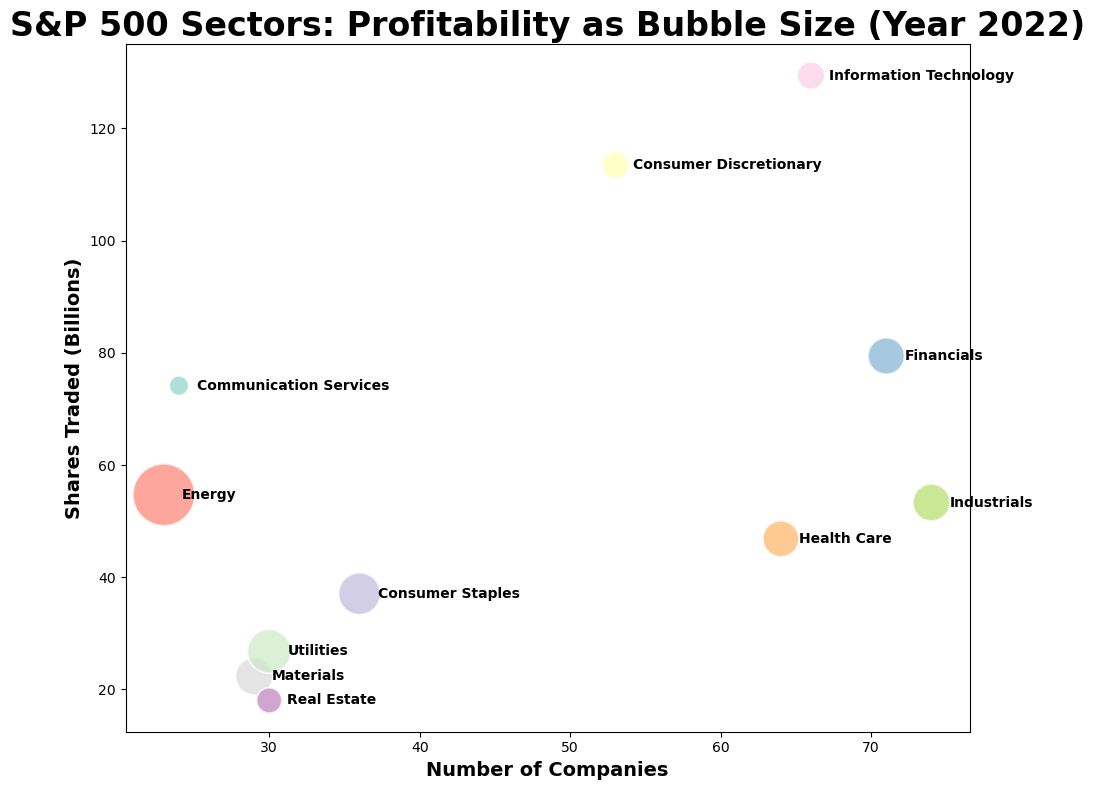

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for the bubble chart
bubble_data = sector_data_table.copy()
bubble_data['Average Monthly Return'] = bubble_data['Profitability'] * 100  # Scale profitability for the bubble size

# Define the color palette 'Set3' with as many colors as there are unique sectors
palette = sns.color_palette('Set3', len(bubble_data['GICS Sector'].unique()))

# Create a color map based on the unique sectors
sector_color_map = {sector: color for sector, color in zip(bubble_data['GICS Sector'].unique(), palette)}

plt.figure(figsize=(10, 8))

# Create the bubble chart without the legend
bubble_plot = sns.scatterplot(
    data=bubble_data,
    x='Number of Companies',
    y='Shares Traded (Billions)',
    size='Average Monthly Return',
    hue='GICS Sector',  # Assign the color based on the GICS Sector
    sizes=(200, 2000),  # Increase the range of bubble sizes
    palette=sector_color_map,  # Apply the color palette
    alpha=0.7,  # Bubble transparency
    legend=False  # Remove the legend
)

# Annotate each bubble with the sector's name
for line in range(0, bubble_data.shape[0]):
    bubble_plot.text(
        bubble_data['Number of Companies'][line] + 1.2,  # X position slightly to the right
        bubble_data['Shares Traded (Billions)'][line],  # Y position remains the same
        bubble_data['GICS Sector'][line],  # Text
        horizontalalignment='left',
        verticalalignment='center',
        size='medium',
        color='black',
        weight='semibold'
    )

# Add titles and labels
plt.title('S&P 500 Sectors: Profitability as Bubble Size (Year 2022)', weight='bold', fontsize=24)
plt.xlabel('Number of Companies', weight='bold', fontsize=14)
plt.ylabel('Shares Traded (Billions)', weight='bold', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\faisa\AppData\Local\Temp\ipykernel_9112\3411678812.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  profitability_pivot = sector_yearly_profitability.pivot('GICS Sector', 'Year', 'mo_return')


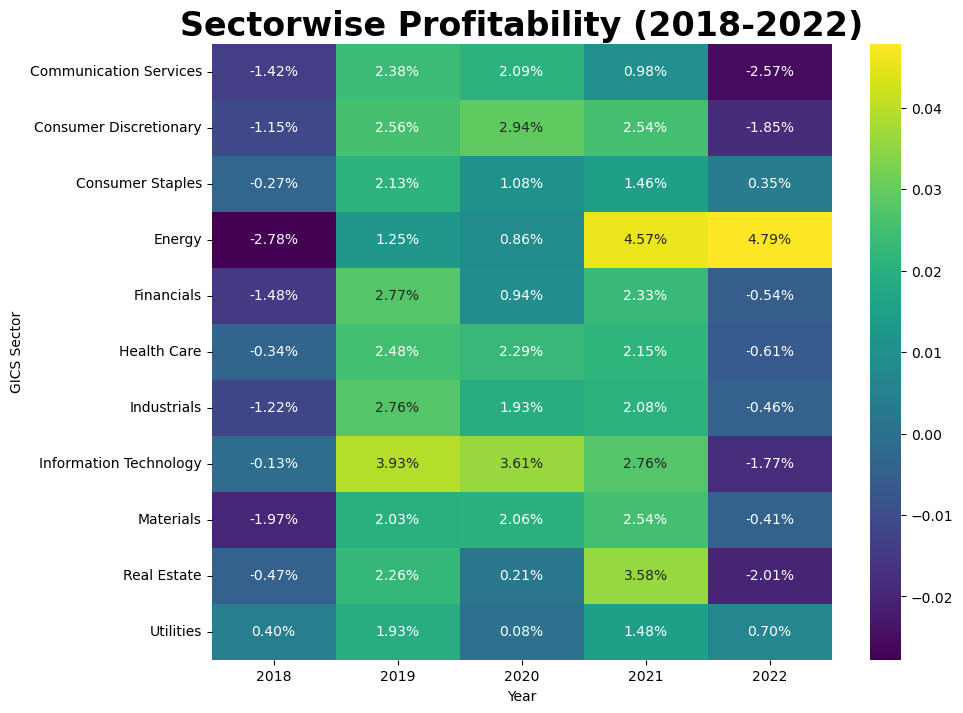

In [202]:
# Sector Profitability

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure we are considering only the years 2018 to 2022
data_filtered = df_ffilled[(df_ffilled['Year'] >= 2018) & (df_ffilled['Year'] <= 2022)]

# Group the data by 'GICS Sector' and 'Year' and calculate the average monthly return for each sector per year
sector_yearly_profitability = data_filtered.groupby(['GICS Sector', 'Year'])['mo_return'].mean().reset_index()

# Pivot the data to get years as columns and sectors as rows
profitability_pivot = sector_yearly_profitability.pivot('GICS Sector', 'Year', 'mo_return')

# Generate the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(profitability_pivot, annot=True, fmt=".2%", cmap='viridis')
plt.title('Sectorwise Profitability (2018-2022)', weight='bold', fontsize=24)
plt.show()

In [203]:
# Install required libraries
!pip install numpy pandas yfinance matplotlib

In [205]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf  # Importing yfinance

In [206]:
# Define the ticker symbol for the S&P 500 Index
ticker_symbol = '^GSPC'

# Set the start and end dates from year 1997 to 2022
start_date = '1997-01-01'
end_date = '2022-12-31'

# Fetch the historical data for the S&P 500 index
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the dataframe
print(sp500_data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-01-02  740.739990  742.809998  729.549988  737.010010  737.010010   
1997-01-03  737.010010  748.239990  737.010010  748.030029  748.030029   
1997-01-06  748.030029  753.309998  743.820007  747.650024  747.650024   
1997-01-07  747.650024  753.260010  742.179993  753.229980  753.229980   
1997-01-08  753.229980  755.719971  747.710022  748.409973  748.409973   

               Volume  
Date                   
1997-01-02  463230000  
1997-01-03  452970000  
1997-01-06  531350000  
1997-01-07  538220000  
1997-01-08  557510000  


In [207]:
# Save the fetched data to a CSV file
sp500_data.to_csv('sp500_data_1997_2022.csv')

In [208]:
# 2nd Dataset: Extracted data from YahooFinance for the S&P 500
sp500_data = pd.read_csv('sp500_data_1997_2022.csv')
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6544 non-null   object 
 1   Open       6544 non-null   float64
 2   High       6544 non-null   float64
 3   Low        6544 non-null   float64
 4   Close      6544 non-null   float64
 5   Adj Close  6544 non-null   float64
 6   Volume     6544 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 358.0+ KB


In [209]:
nan_values = sp500_data.isna().sum()
nan_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

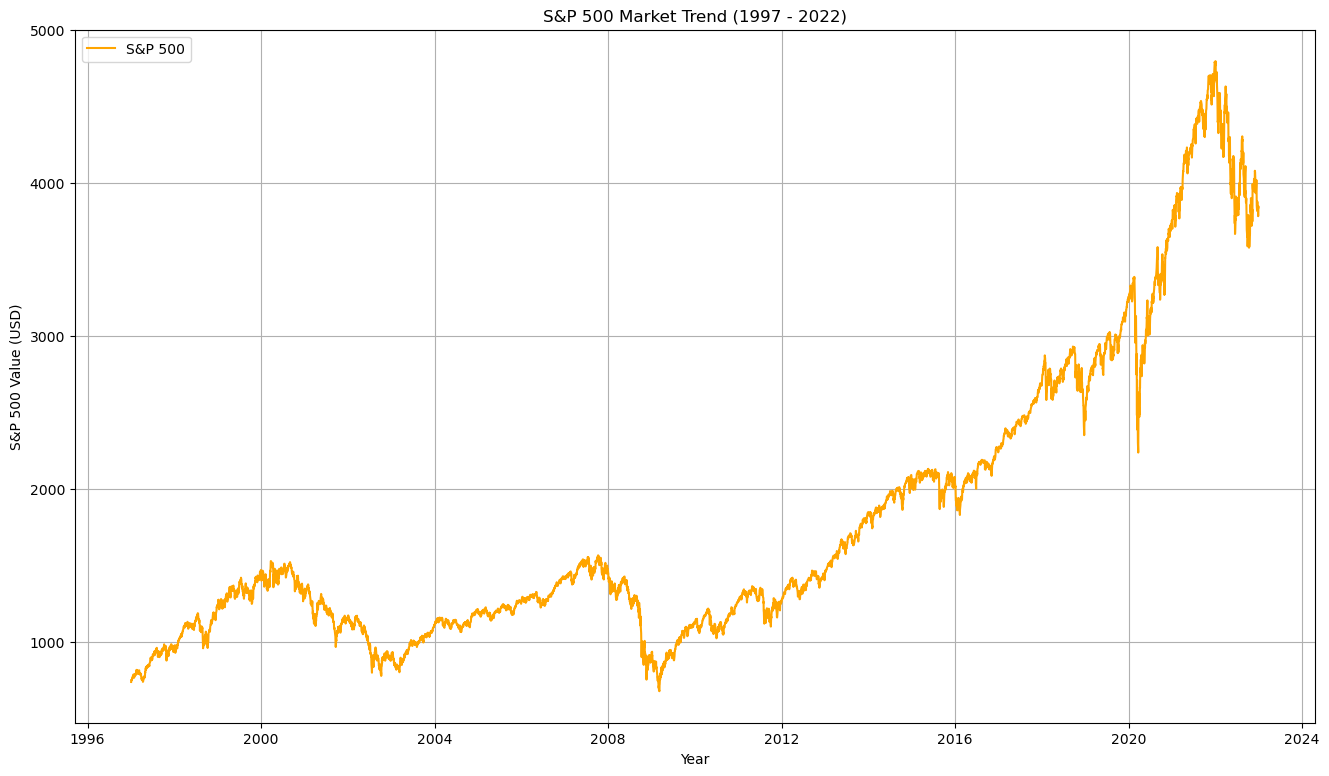

In [210]:
# Parse the 'Date' column into datetime and set as the index

sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
sp500_data.set_index('Date', inplace=True)

# Plotting the 'Close' values with the corrected date index
plt.figure(figsize=(16, 9))
plt.plot(sp500_data['Close'], label='S&P 500', color='orange')
plt.title('S&P 500 Market Trend (1997 - 2022)')
plt.xlabel('Year')
plt.ylabel('S&P 500 Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [211]:
# 3rd Dataset : Unemployment Rate, source: US Bureau of Labor Statistics

unemployment_df = pd.read_csv('labor_force.csv')
unemployment_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
1,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
2,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0
3,2000,4.0,4.1,4.0,3.8,4.0,4.0,4.0,4.1,3.9,3.9,3.9,3.9
4,2001,4.2,4.2,4.3,4.4,4.3,4.5,4.6,4.9,5.0,5.3,5.5,5.7


In [212]:
def monthToNum(shortMonth):
    return{'Jan' : 1,
            'Feb' : 2,
            'Mar' : 3,
            'Apr' : 4,
            'May' : 5,
            'Jun' : 6,
            'Jul' : 7,
            'Aug' : 8,
            'Sep' : 9, 
            'Oct' : 10,
            'Nov' : 11,
            'Dec' : 12
    }[shortMonth]

monthToNum('Feb')

unemployment_df = (unemployment_df.set_index(['Year'])
       .stack().reset_index(name='Unemployment')
                             .rename(columns={'level_1':'Month' }))
       
 
unemployment_df['Month'] = [monthToNum(m) for m in unemployment_df['Month'].values ]
unemployment_df.head()

,Year,Month,Unemployment
0,1997,1,5.3
1,1997,2,5.2
2,1997,3,5.2
3,1997,4,5.1
4,1997,5,4.9


In [213]:
unemployment_df['Date'] = [str(y) + '-' + str(m) + '-' + '01' for y,m in zip(unemployment_df['Year'].values, unemployment_df['Month'].values)]
unemployment_df = unemployment_df[['Date','Unemployment']]
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
unemployment_df.head()

,Date,Unemployment
0,1997-01-01,5.3
1,1997-02-01,5.2
2,1997-03-01,5.2
3,1997-04-01,5.1
4,1997-05-01,4.9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


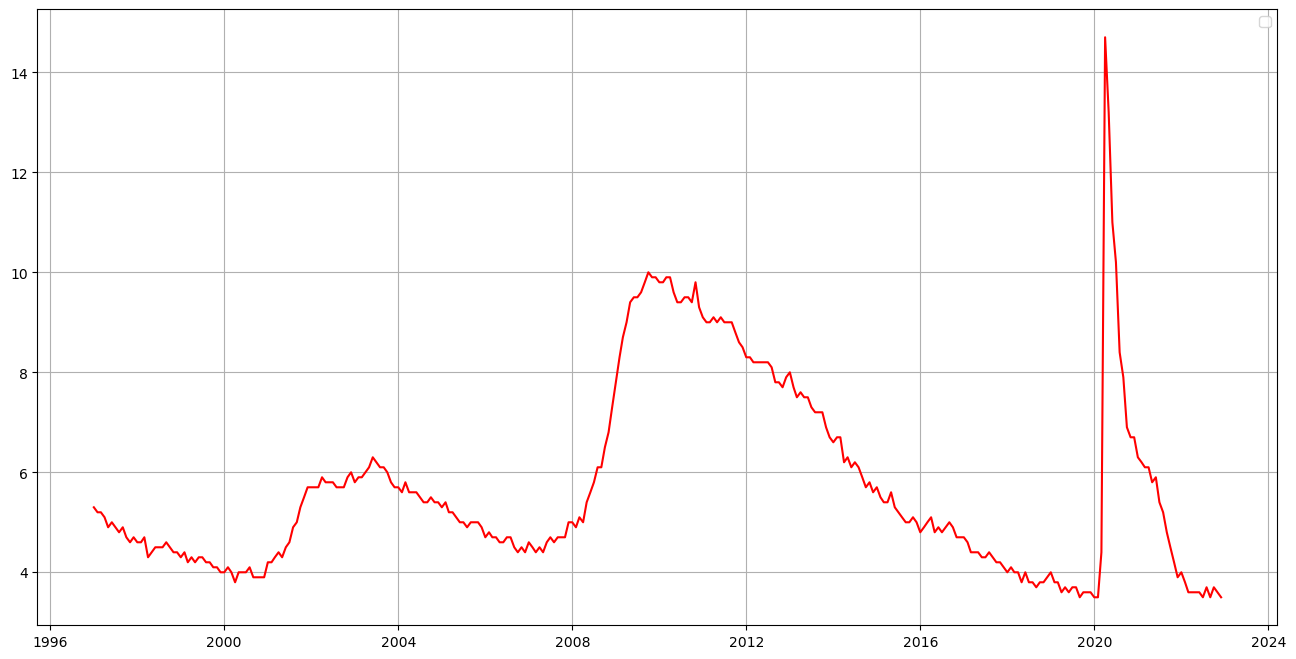

In [214]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(unemployment_df['Date'], unemployment_df['Unemployment'], color='r')
plt.legend()
plt.grid()
plt.show()

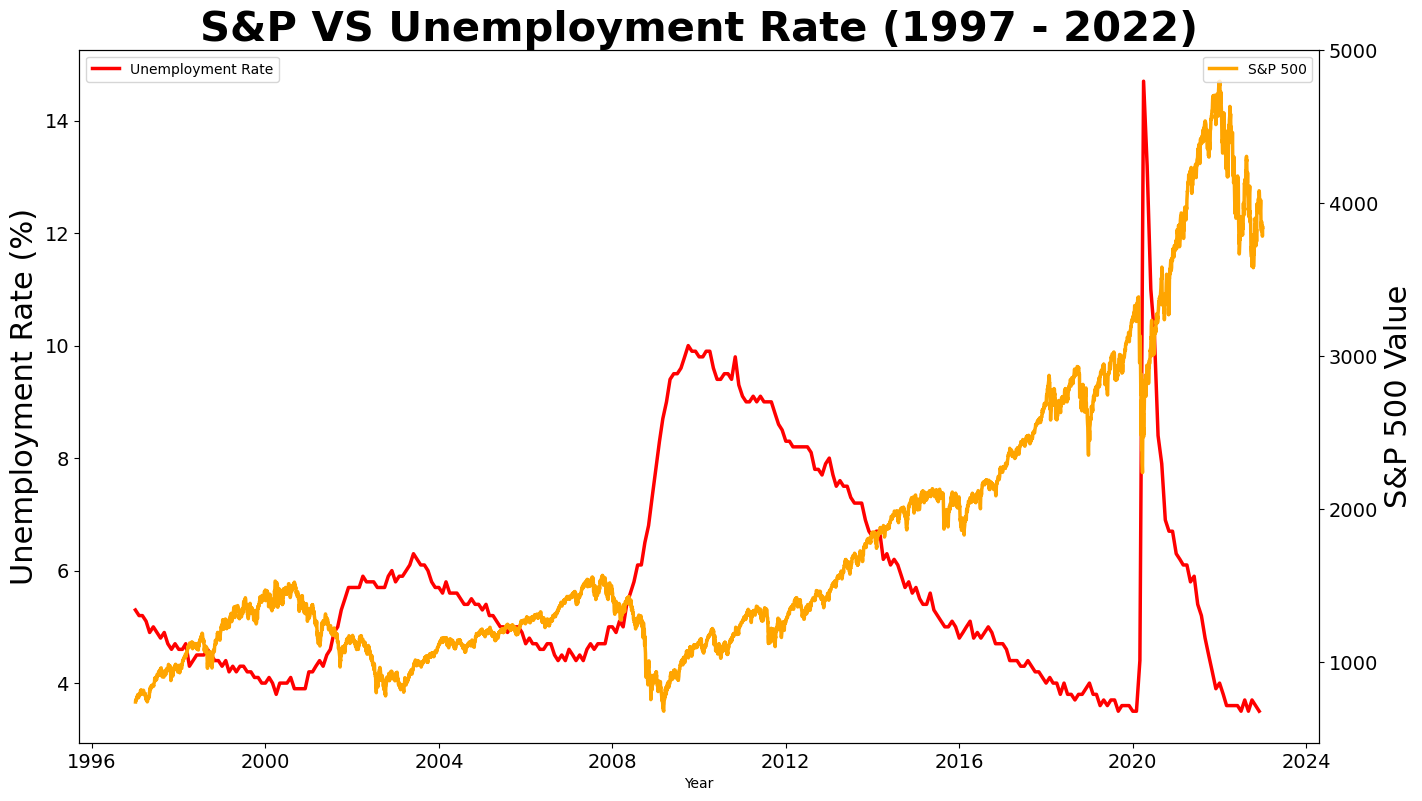

In [264]:
# Creating a figure and a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 9))

# Plotting the unemployment data on the left y-axis with a thicker line
ax1.plot(unemployment_df['Date'], unemployment_df['Unemployment'], label='Unemployment Rate', color='red', linewidth=2.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='black', fontsize = 22)  # Set the y-axis label to black
ax1.tick_params(axis='y', labelcolor='black')  # Set the y-axis tick labels to black
ax1.legend(loc='upper left')

# Creating a second y-axis for the S&P 500 data with a thicker line
ax2 = ax1.twinx()
ax2.plot(sp500_data.index, sp500_data['Close'], label='S&P 500', color='orange', linewidth=2.5)
ax2.set_ylabel('S&P 500 Value', color='black', fontsize = 22)  # Set the y-axis label to black
ax2.tick_params(axis='y', labelcolor='black')  # Set the y-axis tick labels to black
ax2.legend(loc='upper right')

ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Adding title and grid
plt.title('S&P VS Unemployment Rate (1997 - 2022)', weight = 'bold', fontsize = 30)


# Show plot
plt.show()


In [265]:
from scipy.stats import pearsonr

# To calculate the correlation, we need to align the two datasets on the same date.
# First, we'll merge the two datasets on the Date column.
merged_data = pd.merge_asof(unemployment_df.sort_values('Date'), 
                            sp500_data[['Close']].reset_index(), 
                            on='Date', 
                            direction='nearest')

# Calculate the Pearson correlation coefficient and the p-value
correlation, p_value = pearsonr(merged_data['Unemployment'], merged_data['Close'])

correlation_text = f"The correlation between the unemployment rate and the S&P 500 value is {correlation:.3f} and the P-value is {p_value:.3e}."
correlation_text

'The correlation between the unemployment rate and the S&P 500 value is -0.276 and the P-value is 7.652e-07.'

In [231]:
# 4th Dataset : GDP percentage change, Bureau of Economic Analysis

gdp_percentage_change_data = pd.read_csv('GDP_USA_Percentage Change.csv')

# Display the first few rows of the dataframe
gdp_percentage_change_data.head()

gdp_percentage_change_data.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

null_values = gdp_percentage_change_data.isnull().sum()
any_nulls = gdp_percentage_change_data.isnull().values.any()

null_values, any_nulls

(Year                                       0
 GDP in billions of current dollars         0
 GDP in billions of chained 2017 dollars    0
 dtype: int64,
 False)

In [244]:
gdp_percentage_change_data = pd.read_csv('GDP_USA_Percentage Change.csv')

# Display the first few rows of the dataframe
gdp_percentage_change_data.head()

gdp_percentage_change_data.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

null_values = gdp_percentage_change_data.isnull().sum()
any_nulls = gdp_percentage_change_data.isnull().values.any()

null_values, any_nulls


gdp_percentage_change_filtered = gdp_percentage_change_data[(gdp_percentage_change_data['Year'] >= 1997) & (gdp_percentage_change_data['Year'] <= 2022)]

# Convert the 'Year' column to datetime to align with the S&P 500 data for plotting
gdp_percentage_change_filtered['Year'] = pd.to_datetime(gdp_percentage_change_filtered['Year'].astype(str) + '-01-01')

# Display the first few rows of the filtered dataframe
gdp_percentage_change_filtered.head()

C:\Users\faisa\AppData\Local\Temp\ipykernel_9112\231492700.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_percentage_change_filtered['Year'] = pd.to_datetime(gdp_percentage_change_filtered['Year'].astype(str) + '-01-01')


,Year,GDP in billions of current dollars,GDP in billions of chained 2017 dollars
67,1997-01-01,6.2,4.4
68,1998-01-01,5.7,4.5
69,1999-01-01,6.3,4.8
70,2000-01-01,6.4,4.1
71,2001-01-01,3.2,1.0


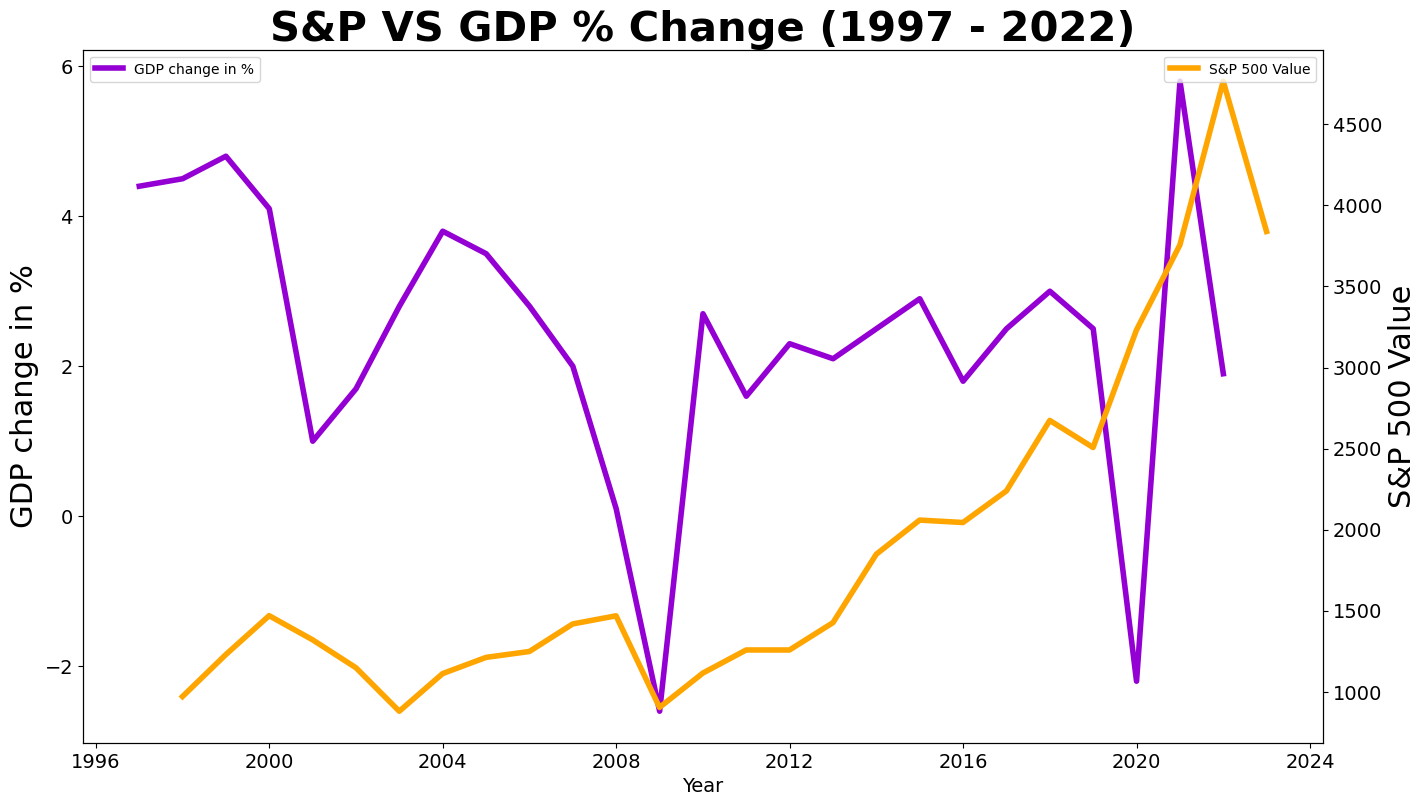

In [263]:
# To compare GDP percentage change and S&P 500 values accurately, we need to:
# Resample the S&P 500 data to get the annual closing price.
# Resample S&P 500 data to get the annual closing price
sp500_annual_close = sp500_data.resample('A').last()['Close']

# Check if the GDP data needs to be expressed in percentage terms

gdp_percentage_change_filtered.columns

# Create a new plot with the correct data
fig, ax1 = plt.subplots(figsize=(16, 9))
# Plotting GDP data on the left y-axis
ax1.plot(gdp_percentage_change_filtered['Year'], gdp_percentage_change_filtered['GDP in billions of chained 2017 dollars'], label='GDP change in %', color='darkviolet', linewidth=4)
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('GDP change in %', color='black', fontsize = 22)  # Changed to black
ax1.tick_params(axis='y', labelcolor='black')  # Changed to black
ax1.legend(loc='upper left')

# Plotting S&P 500 annual closing data on the right y-axis
ax2 = ax1.twinx()
ax2.plot(sp500_annual_close.index, sp500_annual_close.values, label='S&P 500 Value', color='orange', linewidth=4)  # Line graph thicker
ax2.set_ylabel('S&P 500 Value', color='black', fontsize = 22)
ax2.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(loc='upper right')


# Adding title and grid
plt.title('S&P VS GDP % Change (1997 - 2022)', weight = 'bold', fontsize = 30)


# Show plot
plt.show()

In [268]:
from scipy.stats import pearsonr

# Extracting the year from the GDP data
gdp_percentage_change_filtered['Year'] = gdp_percentage_change_filtered['Year'].dt.year

# Creating a new DataFrame for S&P 500 annual close with a 'Year' column
sp500_annual_close_df = sp500_annual_close.reset_index()
sp500_annual_close_df['Year'] = sp500_annual_close_df['Date'].dt.year

# Now we can merge using the 'Year' column as a key
merged_data = pd.merge(gdp_percentage_change_filtered, sp500_annual_close_df, on='Year')

# Calculate the Pearson correlation coefficient and the p-value for the merged data
correlation, p_value = pearsonr(merged_data['GDP in billions of chained 2017 dollars'], merged_data['Close'])

# Prepare the correlation text
correlation_text = f"The correlation between the GDP in billions of chained 2017 dollars and the S&P 500 value is {correlation:.3f}, with a P-value of {p_value:.3e}."
correlation_text

AttributeError: Can only use .dt accessor with datetimelike values

In [269]:
#  If the above code doesn't work
sp500_annual_close_df = sp500_annual_close.to_frame().reset_index()
sp500_annual_close_df['Year'] = sp500_annual_close_df['Date'].dt.year

# Now we can merge using the 'Year' column as a key
merged_data = pd.merge(gdp_percentage_change_filtered, sp500_annual_close_df, on='Year', how='inner')

# Calculate the Pearson correlation coefficient and the p-value for the merged data
correlation, p_value = pearsonr(merged_data['GDP in billions of chained 2017 dollars'], merged_data['Close'])

# Prepare the correlation text
correlation_text = f"The correlation between the GDP in billions of chained 2017 dollars and the S&P 500 value is {correlation:.3f}, with a P-value of {p_value:.3e}."
correlation_text

'The correlation between the GDP in billions of chained 2017 dollars and the S&P 500 value is 0.036, with a P-value of 8.596e-01.'

C:\Users\faisa\AppData\Local\Temp\ipykernel_9112\3110207490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_percentage_change_filtered['Year'] = gdp_percentage_change_filtered['Year'].dt.year


('The correlation between the GDP in billions of chained 2017 dollars and the S&P 500 value is 0.036, with a P-value of 8.596e-01.',
    Year  GDP in billions of current dollars  \
 0  1997                                 6.2   
 1  1998                                 5.7   
 2  1999                                 6.3   
 3  2000                                 6.4   
 4  2001                                 3.2   
 
    GDP in billions of chained 2017 dollars       Date        Close  
 0                                      4.4 1997-12-31   970.429993  
 1                                      4.5 1998-12-31  1229.229980  
 2                                      4.8 1999-12-31  1469.250000  
 3                                      4.1 2000-12-31  1320.280029  
 4                                      1.0 2001-12-31  1148.079956  )

In [241]:
# Since 'Year' in gdp_percentage_change_filtered is already an integer, we just make sure 'Year' in sp500_annual_close_df is also an integer before merging
sp500_annual_close_df = sp500_annual_close.to_frame().reset_index()
sp500_annual_close_df['Year'] = sp500_annual_close_df['Date'].dt.year

# Now we can merge using the 'Year' column as a key
merged_data = pd.merge(gdp_percentage_change_filtered, sp500_annual_close_df, on='Year', how='inner')

# Calculate the Pearson correlation coefficient and the p-value for the merged data
correlation, p_value = pearsonr(merged_data['GDP in billions of chained 2017 dollars'], merged_data['Close'])

# Prepare the correlation text
correlation_text = f"The correlation between the GDP in billions of chained 2017 dollars and the S&P 500 value is {correlation:.3f}, with a P-value of {p_value:.3e}."
correlation_text

'The correlation between the GDP in billions of chained 2017 dollars and the S&P 500 value is 0.036, with a P-value of 8.596e-01.'